<a href="https://colab.research.google.com/github/cybermin/2022_BSSM/blob/main/02_pandas_basic_%ED%95%B4%EA%B2%B0%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


RFID기반 음식물쓰레기 종량제 시스템을 채택한 지자체의  2017년7월~2020년7월까지의 지자체별 RFID음식물쓰레기 배출량를 분석하시오.

+ 광역시도별 음식물 쓰레기 배출량
+ 광역시도별 자료건수
+ 부산광역시 지지체별 음식물 쓰레기 배출량
+ 해운대구 월별 음식물 쓰레기 배출량


---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

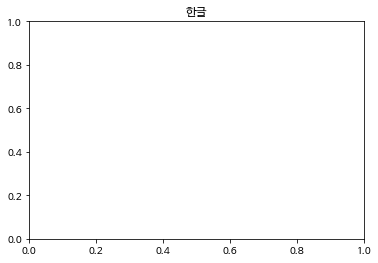

In [ ]:
plt.title('한글')
plt.show()

## 1. 데이터불러오기



In [ ]:
#pandas 라이브러리 추가
import pandas as pd

In [ ]:
#데이터불러오기
df = pd.read_csv('/content/drive/MyDrive/BSSM/BSSM2022/data/지자체별 RFID음식물쓰레기 배출량.csv', engine='python', encoding='cp949') 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   배출연도    5195 non-null   int64 
 1   배출월     5195 non-null   int64 
 2   광역시도    5195 non-null   object
 3   기초지자체   5195 non-null   object
 4   배출량(톤)  5195 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 203.1+ KB


In [ ]:
df.head(2)

,배출연도,배출월,광역시도,기초지자체,배출량(톤)
0,2017,7,서울특별시,종로구,87260
1,2017,7,서울특별시,중구,189784


In [ ]:
df.index

RangeIndex(start=0, stop=5195, step=1)

In [ ]:
df = df.set_index('배출연도')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5195 entries, 2017 to 2020
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   배출월     5195 non-null   int64 
 1   광역시도    5195 non-null   object
 2   기초지자체   5195 non-null   object
 3   배출량(톤)  5195 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 202.9+ KB


In [ ]:
df.index

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='배출연도', length=5195)

In [ ]:
df.head()

,배출월,광역시도,기초지자체,배출량(톤)
배출연도,,,,
2017,7,서울특별시,종로구,87260
2017,7,서울특별시,중구,189784
2017,7,서울특별시,용산구,6679
2017,7,서울특별시,성동구,296140
2017,7,서울특별시,광진구,166759


In [ ]:
area = list(df['광역시도'].unique())
area

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '경기도',
 '강원도',
 '충청북도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도',
 '충청남도']

In [ ]:
df.columns

Index(['배출월', '광역시도', '기초지자체', '배출량(톤)'], dtype='object')

In [ ]:
#2017년도의 부산시 자료추출
df.loc[2017, ['광역시도', '배출량(톤)']]

,광역시도,배출량(톤)
배출연도,,
2017,서울특별시,87260
2017,서울특별시,189784
2017,서울특별시,6679
2017,서울특별시,296140
2017,서울특별시,166759
...,...,...
2017,경상남도,2813
2017,경상남도,109953
2017,경상남도,629


In [ ]:
df[(df.index == 2017) & (df['광역시도'] == '부산광역시')]

,배출월,광역시도,기초지자체,배출량(톤)
배출연도,,,,
2017,7,부산광역시,중구,9596
2017,7,부산광역시,서구,97104
2017,7,부산광역시,동구,59401
2017,7,부산광역시,영도구,187073
2017,7,부산광역시,부산진구,708005
...,...,...,...,...
2017,12,부산광역시,강서구,361519
2017,12,부산광역시,연제구,424298
2017,12,부산광역시,수영구,308573


In [ ]:
df.head()

,배출월,광역시도,기초지자체,배출량(톤)
배출연도,,,,
2017,7,서울특별시,종로구,87260
2017,7,서울특별시,중구,189784
2017,7,서울특별시,용산구,6679
2017,7,서울특별시,성동구,296140
2017,7,서울특별시,광진구,166759


In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,배출연도,배출월,광역시도,기초지자체,배출량(톤)
0,2017,7,서울특별시,종로구,87260
1,2017,7,서울특별시,중구,189784
2,2017,7,서울특별시,용산구,6679
3,2017,7,서울특별시,성동구,296140
4,2017,7,서울특별시,광진구,166759


In [ ]:
#2020년도 서울특별시의 자료 추출
df[(df['배출연도'] == 2020) & (df['광역시도']=='서울특별시')]

,배출연도,배출월,광역시도,기초지자체,배출량(톤)
4281,2020,1,서울특별시,종로구,109999
4282,2020,1,서울특별시,중구,203171
4283,2020,1,서울특별시,용산구,16020
4284,2020,1,서울특별시,성동구,479129
4285,2020,1,서울특별시,광진구,254794
...,...,...,...,...,...
5062,2020,7,서울특별시,관악구,344653
5063,2020,7,서울특별시,서초구,538024
5064,2020,7,서울특별시,강남구,202762
5065,2020,7,서울특별시,강동구,920723


In [ ]:
#부산광역시. 경상남도, 경상북도 => 2019년 

In [ ]:
df[(df['광역시도']== '경상북도') | (df['광역시도'] == '경상남도') |  (df['광역시도'] == '부산광역시')]

,배출연도,배출월,광역시도,기초지자체,배출량(톤)
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5188,2020,7,경상남도,양산시,779858
5189,2020,7,경상남도,의령군,6031
5190,2020,7,경상남도,창녕군,169073
5191,2020,7,경상남도,고성군,39642


In [ ]:
df[df['광역시도'].isin(['부산광역시', '경상남도','경상북도']) & (df['배출연도'].isin([2019, 2020]))]

,배출연도,배출월,광역시도,기초지자체,배출량(톤)
2519,2019,1,부산광역시,중구,7425
2520,2019,1,부산광역시,서구,94938
2521,2019,1,부산광역시,동구,53881
2522,2019,1,부산광역시,영도구,155276
2523,2019,1,부산광역시,부산진구,599766
...,...,...,...,...,...
5188,2020,7,경상남도,양산시,779858
5189,2020,7,경상남도,의령군,6031
5190,2020,7,경상남도,창녕군,169073
5191,2020,7,경상남도,고성군,39642


In [ ]:
#부산광역시 기장군과 영도구의 2020년 쓰레기 배출량자료 추출
df[(df['광역시도'] == '부산광역시') & (df['기초지자체'].isin(['기장군','영도구'])) & (df['배출연도']==2020)]

,배출연도,배출월,광역시도,기초지자체,배출량(톤)
4309,2020,1,부산광역시,영도구,182283
4321,2020,1,부산광역시,기장군,391393
4461,2020,3,부산광역시,영도구,163714
4473,2020,3,부산광역시,기장군,377140
4613,2020,4,부산광역시,영도구,153040
4625,2020,4,부산광역시,기장군,363859
4765,2020,5,부산광역시,영도구,172082
4777,2020,5,부산광역시,기장군,426139
4917,2020,6,부산광역시,영도구,176270
4929,2020,6,부산광역시,기장군,447228


In [ ]:
df['광역시도'] == '부산광역시'

배출연도
2017    False
2017    False
2017    False
2017    False
2017    False
        ...  
2020    False
2020    False
2020    False
2020    False
2020    False
Name: 광역시도, Length: 5195, dtype: bool

In [ ]:
#열명변경 : 배출연도->연도, 배출월->월, 배출량(톤)->배출량
lt = ['연도', '월', '광역시도', '기초지자체', '배출량']
df.columns =  ['연도', '월', '광역시도', '기초지자체', '배출량']

In [ ]:
df.columns 

Index(['연도', '월', '광역시도', '기초지자체', '배출량'], dtype='object')

## 2. 광역시도별 배출량

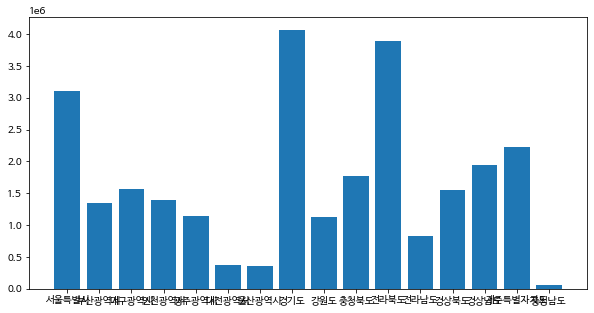

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['광역시도'], df['배출량'])
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df[df['광역시도']=='서울특별시']

,연도,월,광역시도,기초지자체,배출량
0,2017,7,서울특별시,종로구,87260
1,2017,7,서울특별시,중구,189784
2,2017,7,서울특별시,용산구,6679
3,2017,7,서울특별시,성동구,296140
4,2017,7,서울특별시,광진구,166759
...,...,...,...,...,...
5062,2020,7,서울특별시,관악구,344653
5063,2020,7,서울특별시,서초구,538024
5064,2020,7,서울특별시,강남구,202762
5065,2020,7,서울특별시,강동구,920723


In [ ]:
df[df['광역시도']=='서울특별시']['배출량'].mean()

501227.7583815029

In [ ]:
df[df['광역시도']=='서울특별시']['배출량'].std()

488748.61819564574

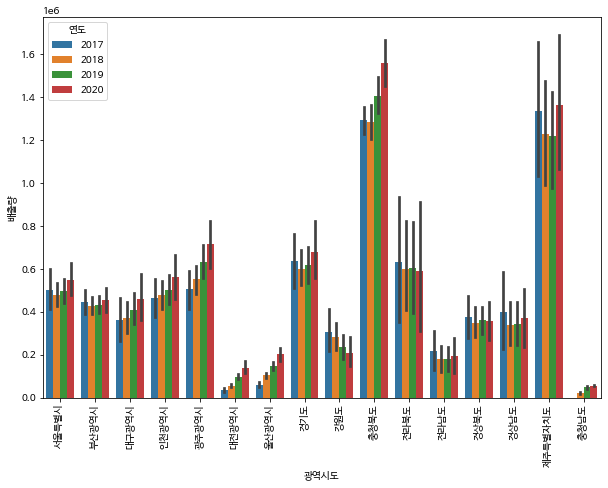

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='광역시도', y='배출량', hue='연도', data=df)

plt.xticks(rotation=90)
plt.show()

## 3.광역시도별 자료 건수

In [ ]:
df['광역시도'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도',
       '충청남도'], dtype=object)

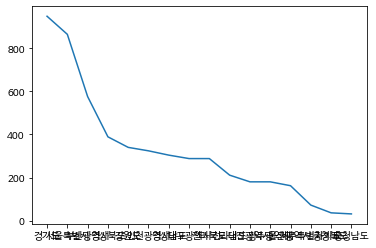

In [ ]:
df2 = df['광역시도'].value_counts()
plt.plot(df2)
plt.show()

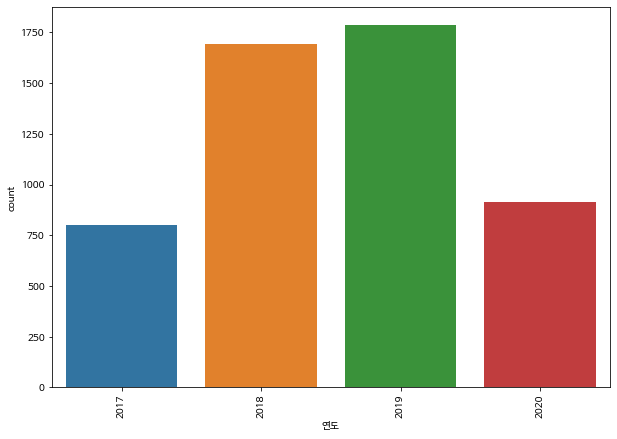

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='연도', data=df)
plt.xticks(rotation=90)
plt.show()

## 4.부산광역시 지자체별 음식물 쓰레기 배출량

In [ ]:
busan = df[(df['광역시도']=='부산광역시') & (df['월']== 7)]
busan 

,연도,월,광역시도,기초지자체,배출량
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5078,2020,7,부산광역시,강서구,428097
5079,2020,7,부산광역시,연제구,474435
5080,2020,7,부산광역시,수영구,335382
5081,2020,7,부산광역시,사상구,626469


In [ ]:
busan['월'].unique()

array([7])

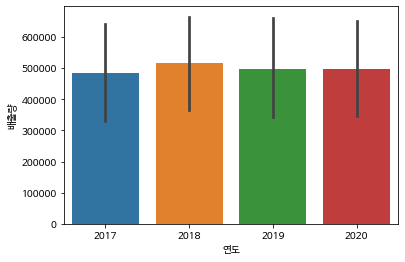

In [ ]:
sns.barplot(x='연도', y ='배출량', data=busan)
plt.show()

In [ ]:
busan = df[(df['광역시도']=='부산광역시')]
busan 

,연도,월,광역시도,기초지자체,배출량
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5078,2020,7,부산광역시,강서구,428097
5079,2020,7,부산광역시,연제구,474435
5080,2020,7,부산광역시,수영구,335382
5081,2020,7,부산광역시,사상구,626469


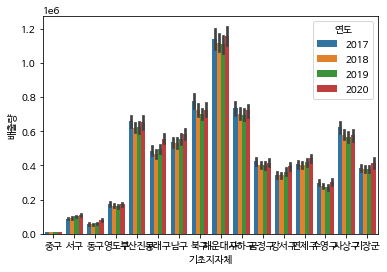

In [ ]:
sns.barplot(x='기초지자체', y='배출량', hue='연도', data=busan)
plt.show()

In [ ]:
h = df[(df['광역시도']=='부산광역시') & (df['기초지자체']=='해운대구')]

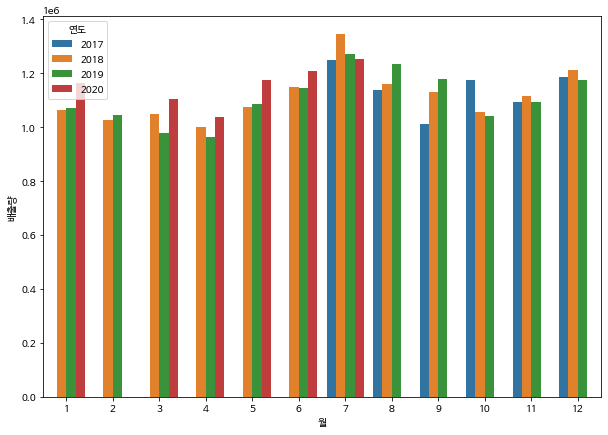

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='월', y='배출량', hue='연도', data=h)
plt.show()